In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\Universities.csv")

In [3]:
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
data.columns

Index(['Univ', 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [6]:
data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_2676\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
SAT,1.000000,0.922522,-0.885850,-0.812552,0.778976,0.747712
Top10,0.922522,1.000000,-0.859181,-0.643435,0.611467,0.745942
Accept,-0.885850,-0.859181,1.000000,0.631664,-0.558439,-0.819550
SFRatio,-0.812552,-0.643435,0.631664,1.000000,-0.781839,-0.560922
Expenses,0.778976,0.611467,-0.558439,-0.781839,1.000000,0.393591
GradRate,0.747712,0.745942,-0.819550,-0.560922,0.393591,1.000000


In [7]:
data.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [8]:
data.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_2676\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


SAT        -0.950910
Top10      -1.219756
Accept      0.867538
SFRatio     1.120719
Expenses    0.852350
GradRate   -0.999521
dtype: float64

In [9]:
data.kurtosis()

C:\Users\user\AppData\Local\Temp\ipykernel_2676\2361870383.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurtosis()


SAT         0.355122
Top10       0.700307
Accept      0.252908
SFRatio     2.353743
Expenses    0.638162
GradRate   -0.164740
dtype: float64

In [16]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:,1:])

In [17]:
data_scaled

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [21]:
wcss = []
for i in range(1,16):
    Kmeans = KMeans(n_clusters = i , random_state = 42)
    Kmeans.fit(data_scaled)
    wcss.append(Kmeans.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [22]:
wcss

[149.99999999999997,
 64.14528395010268,
 44.53176173145096,
 33.654341806512235,
 26.907807926289365,
 22.452524599848374,
 18.750021301705345,
 16.006573668895065,
 13.511072156410831,
 10.729002092323686,
 8.28958293205713,
 6.534490032010417,
 5.493016111483617,
 4.542855750673398,
 3.5888442397910936]

In [23]:
Kmeans.labels_

array([14,  3,  5,  7,  7, 13, 13, 14,  0, 10, 13,  7,  2,  1, 13, 12,  0,
        6,  8, 11,  9,  7,  2,  4,  0])

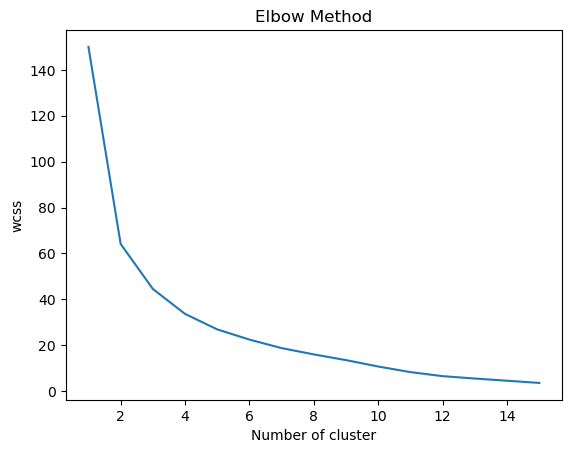

In [24]:
plt.plot(range(1,16),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

In [25]:
kmeans_cluster = KMeans(n_clusters = 4 , random_state = 42)
kmeans_cluster.fit(data_scaled)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [26]:
kmeans_cluster.labels_

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [30]:
data = pd.DataFrame(data_scaled)

In [31]:
data['kmeans_cluster'] = kmeans_cluster.labels_

In [32]:
data

,0,1,2,3,4,5,kmeans_cluster
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303,2
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524,3
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634,0
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229,2
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587,0
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982,2
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982,2
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945,0
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339,2
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550,3


## Silhouette Score

In [33]:
from sklearn import metrics

In [38]:
metrics.silhouette_score(data_scaled , Kmeans.labels_)


0.14307226434232603

## Formula for silhouette score
### a = mean distance to all other points in  cluster
### b = mean distance to other points in the  next nearest cluster
### formula = b-a/max(a*b)
### range for -1 to 1
#### -1 indicates bad model , 1 indicates = good model